### K-means Clustering Algo implementation with an example

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Reference link:https://github.com/ugis22/clustering_analysis

In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

### Exploring the data

In [5]:
### check for missing data

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
### check for duplicate rows

In [8]:
df.duplicated().sum()

0

In [9]:
### Descriptive statistics

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
### Convert categorical column into numeric

In [12]:
df_new = pd.get_dummies(df['Gender'])

In [13]:
df_new.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [14]:
df.drop(['Gender','CustomerID'],inplace=True,axis=1)

In [15]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
df1 = pd.concat((df_new,df),axis=1)

In [17]:
df1.head()

,Female,Male,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39
1,0,1,21,15,81
2,1,0,20,16,6
3,1,0,23,16,77
4,1,0,31,17,40


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)  #n_components=2,for visualization only
pca_X = pca.fit_transform(df1.values)

In [20]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(pca_X)
    wcss.append(km.inertia_)
    

C:\Users\risha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


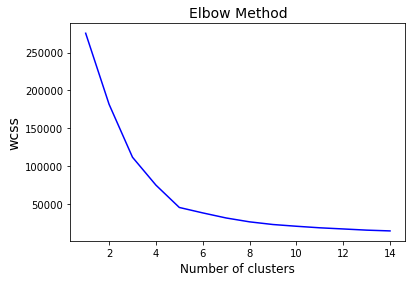

In [21]:
plt.plot(range(1,15),wcss, c="blue")

plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

### no. of clusters may be 5.

In [22]:
X = df1.values

In [23]:
kmeans = KMeans(n_clusters=5,random_state=1)

# Fit and predict 
kmeans.fit(pca_X)

y_pred = kmeans.predict(pca_X)

#fit()


In [24]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [25]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [26]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

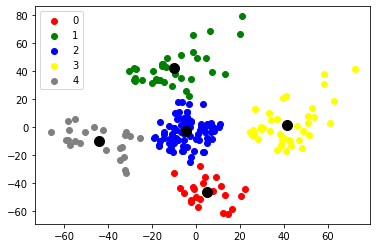

In [27]:
for i,color in zip(np.unique(y_pred),['red','green','blue','yellow','gray']):
    
    plt.scatter(pca_X[y_pred==i,0],pca_X[y_pred==i,1],c=color,label=i)

plt.legend()
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)
plt.show()

In [28]:
df1.columns

Index(['Female', 'Male', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
test_sample = np.array([[0, 1, 40, 32, 10]]) 
 
t1 = pca.transform(test_sample)
t1

array([[-48.62633819,   0.134236  ]])

In [30]:
t1.shape

(1, 2)

In [31]:
new_customer = kmeans.predict(t1)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 4


In [32]:
#load_digit

In [33]:
#Try Herarichal Clustering

In [34]:
#Try Density based Clustering